In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
sns.set_palette("Blues_d")

from IPython.display import HTML

# import the widgets module
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

warnings.filterwarnings("ignore")
#sns.set(style="whitegrid")

# 2. Median Voter Theorem (MVT) 

#### Finding the Median

NumPy allows us to make useful calculations with numerical data. Imagine we have some array of numbers -- our data -- and that we wish to find the median value of the data. A NumPy method that allows us to do this is `np.median` (where `np` refers to NumPy), which takes as input some data and outputs the median value for that data. Run the cell below, which should generate 72 random numbers.

In [3]:
data = np.random.randint(0,100,size=72)
data

array([78, 89, 62, 74, 74, 62, 45, 36, 31, 21, 13, 66, 90, 14, 57, 26, 57,
        4, 30, 12,  9, 64, 16,  0, 24, 50, 88, 27, 16, 91, 74, 88, 86, 21,
       69, 33, 63, 66, 48, 68, 78, 61,  3, 99, 74, 49, 46,  3, 84, 64, 76,
       18, 99, 47, 19, 10, 35, 71, 12, 86, 30, 11, 97,  4, 67, 49, 69, 88,
        0,  7,  5, 97])

Now, with the `data` above, use the `np.median` method to find the median value for the data. 

In [4]:
median = np.median(data)
median

49.5

For parts 1-4 you will need the functions defined below. Simply run the following code cells. 

In [5]:
possibilities = [[45, 5, 1, 5, 45], [45, 5, 0, 5, 45], [45, 5, 0, 6, 45]]

In [6]:
def make_count(count, number):
    return np.array([np.ones(count) * number])

def make_count_array(counts):
    bases = [-2, -1, 0, 1, 2]
    arr = np.array([])
    for i, j in zip(counts, bases):
        arr = np.append(arr, make_count(i, j))
    return np.array([int(i) for i in arr])

In [7]:
politicalStances = {-2: 'Extreme Left', -1:'Moderate Left', 0:'Centrist',
                   1:'Moderate Right', 2:'Extreme Right'}
colors = {-2:'blue', -1:'deepskyblue', 0:'green', 1:'tomato', 2:'red'}

def make_color_arr(dta):
    arr = []
    for i in dta:
        arr.append(colors[i])
    return arr

In [8]:
def plot_voters(counts):
    pos = [] 
    keys = {} # this dict will help to keep track ...
    
    data = make_count_array(counts)

    # this loop will give us a list of frequencies to each number
    for num in data: 
        if num not in keys:
            keys[num] = 1
            pos.append(1)
        else:
            keys[num] += 1
            pos.append(keys[num])
    
    
    for key, value in zip(keys.keys(), keys.values()):
        print('There are ' + str(value) + ' ' + politicalStances[key] + 
              ' (' + str(key) + ') ' + 'voters')
        
    colorArr = make_color_arr(data)
    
    plt.scatter(data, pos, c=colorArr)
    plt.grid(False)
    plt.xticks([-2, -1, 0, 1, 2])
    plt.show()

Here is a quote about campaign strategy from a Liberal activist: “The key data is this, and it’s
important to reemphasize if only to shut up the useless, overpaid political consultants who
idiotically babble about ‘moving to the center’ or ‘compromising with the other side’...What
matters is turning out our voters. That’s it. The Democrats win when we fire up and turn out our
base.” (A party’s “base” is considered to be its most ideologically committed voters. For
example, the Pizza4All party’s base is pizza fanatics.)  


Why might it be better to pick a platform to please the base rather than the median voter? Let’s
try a variant of the Downs model from class. Suppose there are five possible voter ideal points: 
 
| Number | Political Stance       |
|--------|------------------------|
| -2     | Extreme or "Base" Left |
| -1     | Moderate Left          |
| 0      | Centrist               |
| 1      | Moderate Right         |
| 2      | Extreme Right          |

Other than this, retain the same assumptions of the model from class: there
are two parties A and B, who don’t care about policy and prefer winning to tying to losing. The
parties simultaneously set platforms, and the voters vote for whichever party proposes a closer
platform.

**Part 1:** A naive way to predict that parties will cater to the bases is if there are lots of
extreme voters and few centrists. Run the cells below to generate 101 voters and their political stances.

Use the Median Voter Theorem (MVT) to show that there is a unique Nash Equilibrium to this
game where both parties propose the platform of the single centrist voter.

In [9]:
data = make_count_array([45, 5, 1, 5, 45])

There are 45 Extreme Left (-2) voters
There are 5 Moderate Left (-1) voters
There are 1 Centrist (0) voters
There are 5 Moderate Right (1) voters
There are 45 Extreme Right (2) voters


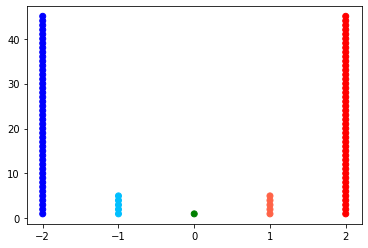

In [10]:
plot_voters([45, 5, 1, 5, 45])

There are 50 Extreme Left (-2) voters
There are 3 Moderate Left (-1) voters
There are 3 Moderate Right (1) voters
There are 50 Extreme Right (2) voters


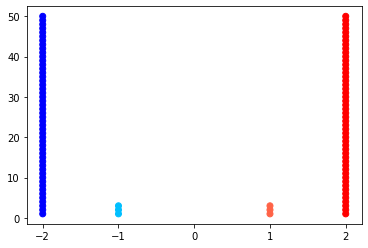

In [11]:
plot_voters()

- f(voter dist, cand pos a, cand pos b)
- sliders for candidates 

There are 45 Extreme Left (-2) voters
There are 5 Moderate Left (-1) voters
There are 5 Moderate Right (1) voters
There are 45 Extreme Right (2) voters


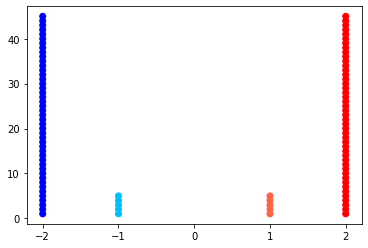

In [12]:
plot_voters([45, 5, 0, 5, 45])

In [13]:
np.median(make_count_array([45, 5, 0, 5, 70]))

2.0

In [99]:
interact(plot_voters, x=[(0, 100)], dat=fixed("a"))

ValueError: cannot find widget or abbreviation for argument: 'counts'

In [102]:
county_widget = widgets.Dropdown(
    options=possibilities, 
    value='possibilities',
    description='Voter Distribution:',
    disabled=False,
)

interact(plot_voters, x=possibilities);

TraitError: Invalid selection: value not found

In [79]:
widgets.IntSlider(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

IntSlider(value=7, continuous_update=False, description='Test:', max=10)

In [80]:
widgets.Checkbox(
    value=False,
    description='Check me',
    disabled=False
)

Checkbox(value=False, description='Check me')

In [81]:
widgets.ToggleButtons(
    options=['Slow', 'Regular', 'Fast'],
    description='Speed:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['Description of slow', 'Description of regular', 'Description of fast'],
#     icons=['check'] * 3
)

ToggleButtons(description='Speed:', options=('Slow', 'Regular', 'Fast'), tooltips=('Description of slow', 'Des…

In [82]:
def f(x):
    return x * 3
interact(f, x=10);

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

In [85]:
interact(f, x=['orange', 'apple'])

interactive(children=(Dropdown(description='x', options=('orange', 'apple'), value='orange'), Output()), _dom_…

<function __main__.f(x)>

In [55]:
np.median(data)

0.0

**Part 2:** Now, suppose we remove the centrist voter. Since the remaining electorate has an even number 100 voters, we cannot directly use the MVT derived in class (which needs an odd number).  

Argue why there is still no Nash Equillibrium where a party proposes the platform preferred by a base voter (-2 or 2).  

No need to do any math, just show logically why at least one party could change their strategy and increase their payoff. 

**Part 3** Argue why, in the 100 person electorate, there is an NE where one party offers the platform -1 and the other offers platform 1.

**Part 4** How might you modify the assumptions of this model to get a NE where parties propose the platforms preferred by the extreme voters, their base (-2 or 2). 